In [116]:
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.colors as mcolors


# from analysis_plot_kit.core import fig_generator
from psPlotKit.data_plotter.fig_generator import figureGenerator

In [117]:
data_MVC_seawater = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\data_MVC_sea_2D.csv')
data_MVC_nacl = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\data_MVC_nacl_2D.csv')
data_MVC_simple = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\data_MVC_simple_2D.csv')
data_MVC_reaktoro = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\data_MVC_reaktoro_2D.csv')

In [118]:
# find errors and create dataframe
results_col = ["LCOW","SEC", "Evaporator area" , "Compressor pressure ratio", "Brine Enth Flow" , "Vapor Pressure"] 
error_sea_MVC = pd.DataFrame()
error_nacl_MVC = pd.DataFrame()
error_simple_MVC = pd.DataFrame()

for i in results_col:
    error_sea_MVC[i] = pd.DataFrame((data_MVC_reaktoro[i] - data_MVC_seawater[i]) / data_MVC_reaktoro[i]) * 100
    error_nacl_MVC[i] = pd.DataFrame((data_MVC_reaktoro[i] - data_MVC_nacl[i]) / data_MVC_reaktoro[i]) * 100
    error_simple_MVC[i] = pd.DataFrame((data_MVC_reaktoro[i] - data_MVC_simple[i]) / data_MVC_reaktoro[i]) * 100

In [119]:
# Sea errors
for i in results_col:
    print(i)
    print(np.mean(error_sea_MVC[i]))

# NaCl errors
for i in results_col:
    print(i)
    print(np.mean(error_nacl_MVC[i]))

LCOW
-0.607601393172951
SEC
-1.4229538133037263
Evaporator area
0.6812072058627212
Compressor pressure ratio
-0.6820681677009829
Brine Enth Flow
8.533690237460496
Vapor Pressure
0.7912038785041459
LCOW
-0.6903679737052254
SEC
-1.1425407253202289
Evaporator area
-0.11508303363454135
Compressor pressure ratio
-0.5474040884884701
Brine Enth Flow
-1.4802287894847543
Vapor Pressure
1.141519357278901


In [120]:
xticks = ([35, 50, 70, 100, 125,])
yticks = ([45,50,55,60,65,70,75])

In [121]:
# figure.set_default_figure_settings(font_size=12, label_size=12)

(35,)
[ 35.  50.  70. 100. 125.] [45. 50. 55. 60. 65. 70. 75.]
[0] [0] 1.532206 35.0 45.0
[0] [1] 1.523911 35.0 50.0
[0] [2] 1.519036 35.0 55.00000000000001
[0] [3] 1.516967 35.0 60.0
[0] [4] 1.517588 35.0 65.0
[0] [5] 1.521324 35.0 70.0
[0] [6] 1.5295 35.0 75.0
[1] [0] 1.541422 50.0 45.0
[1] [1] 1.534725 50.0 50.0
[1] [2] 1.531844 50.0 55.00000000000001
[1] [3] 1.532368 50.0 60.0
[1] [4] 1.53653 50.0 65.0
[1] [5] 1.545432 50.0 70.0
[1] [6] 1.561867 50.0 75.0
[2] [0] 1.556235 70.0 45.0
[2] [1] 1.551901 70.0 50.0
[2] [2] 1.552144 70.0 55.00000000000001
[2] [3] 1.556924 70.0 60.0
[2] [4] 1.567181 70.0 65.0
[2] [5] 1.585483 70.0 70.0
[2] [6] nan 70.0 75.0
[3] [0] 1.584203 100.0 45.0
[3] [1] 1.584134 100.0 50.0
[3] [2] 1.590476 100.0 55.00000000000001
[3] [3] nan 100.0 60.0
[3] [4] nan 100.0 65.0
[3] [5] nan 100.0 70.0
[3] [6] nan 100.0 75.0
[4] [0] 1.613447 125.0 45.0
[4] [1] nan 125.0 50.0
[4] [2] nan 125.0 55.00000000000001
[4] [3] nan 125.0 60.0
[4] [4] nan 125.0 65.0
[4] [5] nan 125.0

C:\Users\sss0031\AppData\Local\Temp\1\ipykernel_18320\624810288.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  figure.colorMaps["color_map"] = cm.get_cmap("GnBu")


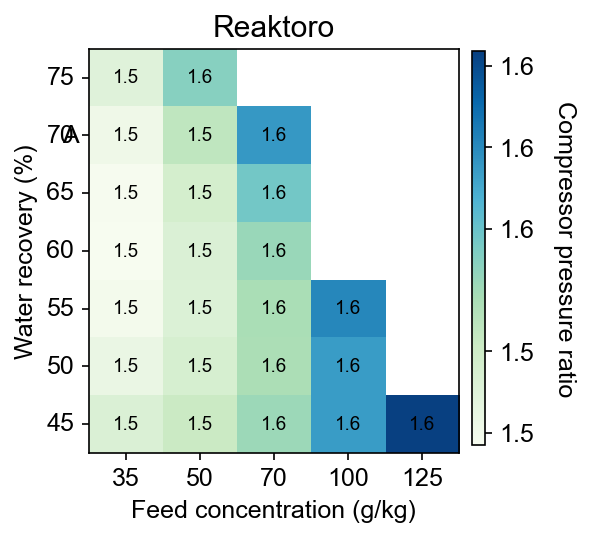

In [122]:
# data_MVC_reaktoro = data_MVC_reaktoro.dropna()

vmin = np.min(data_MVC_reaktoro["Compressor pressure ratio"])
vmax = np.max(data_MVC_reaktoro["Compressor pressure ratio"])

zticks = np.linspace(vmin, vmax, 5)
zticks = np.around(zticks, decimals=2)
figure = figureGenerator()

figure.init_figure(width=3.5, height=3.5)
figure.set_default_figure_settings(font_size=12, label_size=12)
figure.colorMaps["color_map"] = cm.get_cmap("GnBu")
figure.add_text(-0.75, 5, "A")
figure.set_title("Reaktoro")
figure.plot_map(
    xdata=data_MVC_reaktoro["# Inlet Salinity"]*1000,
    ydata=data_MVC_reaktoro["Water Recovery"]*100,
    zdata=data_MVC_reaktoro["Compressor pressure ratio"],
    text=True,
    textfontsize= 9,
    text_color="black",
    build_map=True,
    vmin=vmin,
    vmax=vmax,
)
figure.add_colorbar(zticks=zticks, zformat=1, zlabel="Compressor pressure ratio", zlabelpad=20)
figure.set_axis_ticklabels(
    xticklabels=xticks,
    yticklabels=yticks,
    xformat=0,
    yformat=0,
    xlabel="Feed concentration (g/kg)",
    ylabel="Water recovery (%)",
    fontsize=12
)

figure.save_fig(name="plot_reaktoro_op_p_MVC")

C:\Users\sss0031\AppData\Local\Temp\1\ipykernel_18320\3607609166.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  figure.colorMaps["color_map"] = cm.get_cmap("GnBu")


(35,)
[ 35.  50.  70. 100. 125.] [45. 50. 55. 60. 65. 70. 75.]
[0] [0] 4.367555 35.0 45.0
[0] [1] 4.302168 35.0 50.0
[0] [2] 4.256808 35.0 55.00000000000001
[0] [3] 4.22673 35.0 60.0
[0] [4] 4.209661 35.0 65.0
[0] [5] 4.205529 35.0 70.0
[0] [6] 4.217183 35.0 75.0
[1] [0] 4.384947 50.0 45.0
[1] [1] 4.326331 50.0 50.0
[1] [2] 4.288416 50.0 55.00000000000001
[1] [3] 4.267128 50.0 60.0
[1] [4] 4.261212 50.0 65.0
[1] [5] 4.27237 50.0 70.0
[1] [6] 4.307092 50.0 75.0
[2] [0] 4.415793 70.0 45.0
[2] [1] 4.3666 70.0 50.0
[2] [2] 4.33954 70.0 55.00000000000001
[2] [3] 4.331629 70.0 60.0
[2] [4] 4.343423 70.0 65.0
[2] [5] 4.380105 70.0 70.0
[2] [6] nan 70.0 75.0
[3] [0] 4.478345 100.0 45.0
[3] [1] 4.444501 100.0 50.0
[3] [2] 4.43641 100.0 55.00000000000001
[3] [3] nan 100.0 60.0
[3] [4] nan 100.0 65.0
[3] [5] nan 100.0 70.0
[3] [6] nan 100.0 75.0
[4] [0] 4.545342 125.0 45.0
[4] [1] nan 125.0 50.0
[4] [2] nan 125.0 55.00000000000001
[4] [3] nan 125.0 60.0
[4] [4] nan 125.0 65.0
[4] [5] nan 125.0 70

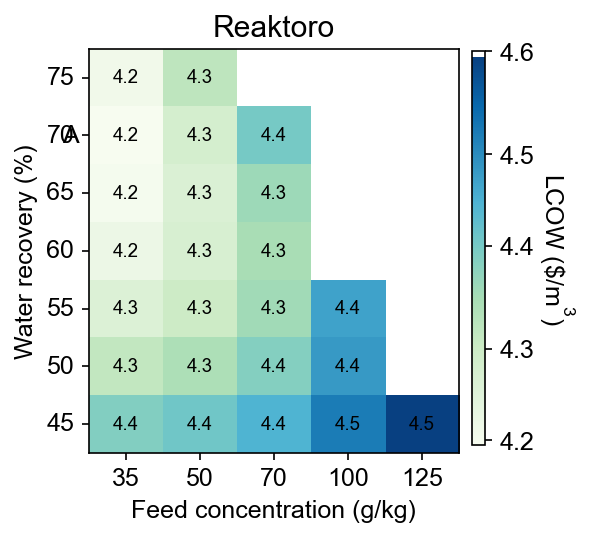

In [123]:

vmin = np.min(data_MVC_reaktoro["LCOW"])
vmax = np.max(data_MVC_reaktoro["LCOW"])

zticks = np.linspace(vmin, vmax, 5)
zticks = np.around(zticks, decimals=2)
figure = figureGenerator()
figure.init_figure(width=3.5, height=3.5)
figure.set_default_figure_settings(font_size=12, label_size=12)
figure.colorMaps["color_map"] = cm.get_cmap("GnBu")
figure.add_text(-0.75, 5, "A")
figure.set_title("Reaktoro")
figure.plot_map(
    xdata=data_MVC_reaktoro["# Inlet Salinity"] *1000,
    ydata=data_MVC_reaktoro["Water Recovery"]*100,
    zdata=data_MVC_reaktoro["LCOW"],
    text=True,
    textfontsize= 9,
    text_color="black",
    build_map=True,
    vmin=vmin,
    vmax=vmax,
)
figure.add_colorbar(zticks=zticks, zformat=1, zlabel="LCOW ($\$$/m$^3$)", zlabelpad=20)
figure.set_axis_ticklabels(
    xticklabels=xticks,
    yticklabels=yticks,
    xformat=1,
    yformat=0,
    xlabel="Feed concentration (g/kg)",
    ylabel="Water recovery (%)",
    fontsize=12
)

figure.save_fig(name="plot_reaktoro_lcow_MVC")

C:\Users\sss0031\AppData\Local\Temp\1\ipykernel_18320\1840390876.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  figure.colorMaps["color_map"] = cm.get_cmap("GnBu")


(35,)
[ 35.  50.  70. 100. 125.] [45. 50. 55. 60. 65. 70. 75.]
[0] [0] 20.02695 35.0 45.0
[0] [1] 19.76564 35.0 50.0
[0] [2] 19.60778 35.0 55.00000000000001
[0] [3] 19.53551 35.0 60.0
[0] [4] 19.54539 35.0 65.0
[0] [5] 19.6499 35.0 70.0
[0] [6] 19.88776 35.0 75.0
[1] [0] 20.29634 50.0 45.0
[1] [1] 20.08477 50.0 50.0
[1] [2] 19.98804 50.0 55.00000000000001
[1] [3] 19.99411 50.0 60.0
[1] [4] 20.10957 50.0 65.0
[1] [5] 20.36568 50.0 70.0
[1] [6] 20.84119 50.0 75.0
[2] [0] 20.72697 70.0 45.0
[2] [1] 20.58777 70.0 50.0
[2] [2] 20.58465 70.0 55.00000000000001
[2] [3] 20.71587 70.0 60.0
[2] [4] 21.00707 70.0 65.0
[2] [5] 21.52816 70.0 70.0
[2] [6] nan 70.0 75.0
[3] [0] 21.53031 100.0 45.0
[3] [1] 21.51748 100.0 50.0
[3] [2] 21.68987 100.0 55.00000000000001
[3] [3] nan 100.0 60.0
[3] [4] nan 100.0 65.0
[3] [5] nan 100.0 70.0
[3] [6] nan 100.0 75.0
[4] [0] 22.35523 125.0 45.0
[4] [1] nan 125.0 50.0
[4] [2] nan 125.0 55.00000000000001
[4] [3] nan 125.0 60.0
[4] [4] nan 125.0 65.0
[4] [5] nan 125

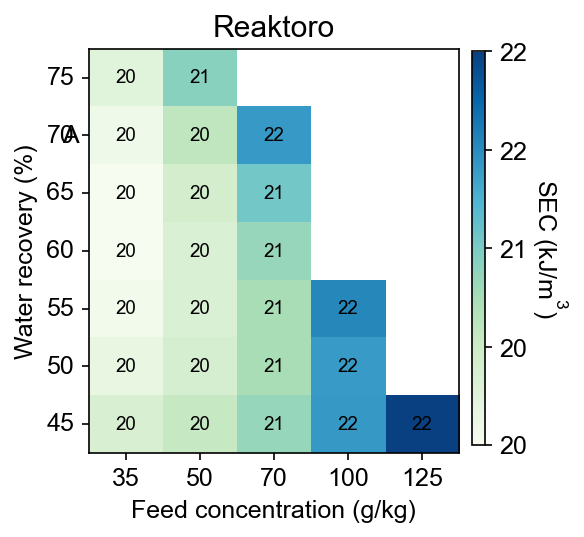

In [124]:
vmin = np.min(data_MVC_reaktoro["SEC"])
vmax = np.max(data_MVC_reaktoro["SEC"])

zticks = np.linspace(vmin,vmax, 5)
zticks = np.around(zticks, decimals=2)
figure = figureGenerator()
figure.init_figure(width=3.5, height=3.5)
figure.set_default_figure_settings(font_size=12, label_size=12)
figure.colorMaps["color_map"] = cm.get_cmap("GnBu")
figure.add_text(-0.75, 5, "A")
figure.set_title("Reaktoro")
figure.plot_map(
    xdata=data_MVC_reaktoro["# Inlet Salinity"] *1000,
    ydata=data_MVC_reaktoro["Water Recovery"]*100,
    zdata=data_MVC_reaktoro["SEC"],
    text=True,
    textfontsize= 9,
    text_color="black",
    build_map=True,
    vmin=vmin,
    vmax=vmax,
)
figure.add_colorbar(zticks=zticks, zformat=1, zlabel="SEC (kJ/m$^{3}$)", zlabelpad=20)
figure.set_axis_ticklabels(
    xticklabels=xticks,
    yticklabels=yticks,
    xformat=1,
    yformat=0,
    xlabel="Feed concentration (g/kg)",
    ylabel="Water recovery (%)",
    fontsize=12
)

figure.save_fig(name="plot_reaktoro_sec_MVC")

C:\Users\sss0031\AppData\Local\Temp\1\ipykernel_18320\3022311249.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  figure.colorMaps["color_map"] = cm.get_cmap("GnBu")


(35,)
[ 35.  50.  70. 100. 125.] [45. 50. 55. 60. 65. 70. 75.]
[0] [0] 645.897 35.0 45.0
[0] [1] 731.0037 35.0 50.0
[0] [2] 815.337 35.0 55.00000000000001
[0] [3] 898.971 35.0 60.0
[0] [4] 981.9564 35.0 65.0
[0] [5] 1064.282 35.0 70.0
[0] [6] 1145.774 35.0 75.0
[1] [0] 658.22 50.0 45.0
[1] [1] 744.6741 50.0 50.0
[1] [2] 830.2483 50.0 55.00000000000001
[1] [3] 914.9808 50.0 60.0
[1] [4] 998.8361 50.0 65.0
[1] [5] 1081.597 50.0 70.0
[1] [6] 1162.557 50.0 75.0
[2] [0] 674.1177 70.0 45.0
[2] [1] 762.3944 70.0 50.0
[2] [2] 849.5415 70.0 55.00000000000001
[2] [3] 935.4804 70.0 60.0
[2] [4] 1019.92 70.0 65.0
[2] [5] 1102.042 70.0 70.0
[2] [6] nan 70.0 75.0
[3] [0] 696.6089 100.0 45.0
[3] [1] 787.5608 100.0 50.0
[3] [2] 876.6516 100.0 55.00000000000001
[3] [3] nan 100.0 60.0
[3] [4] nan 100.0 65.0
[3] [5] nan 100.0 70.0
[3] [6] nan 100.0 75.0
[4] [0] 713.8156 125.0 45.0
[4] [1] nan 125.0 50.0
[4] [2] nan 125.0 55.00000000000001
[4] [3] nan 125.0 60.0
[4] [4] nan 125.0 65.0
[4] [5] nan 125.0 70

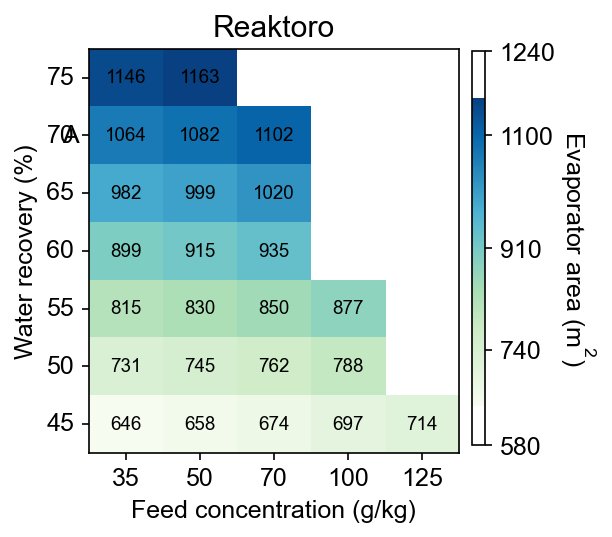

In [125]:

vmin = abs(np.min(data_MVC_reaktoro["Evaporator area"]))
vmax = abs(np.max(data_MVC_reaktoro["Evaporator area"]))

zticks = ([580, 740, 910, 1100, 1240])#np.linspace(vmin, vmax, 5)
zticks = np.around(zticks, decimals=0)
figure = figureGenerator()
figure.init_figure(width=3.5, height=3.5)
figure.set_default_figure_settings(font_size=12, label_size=12)
figure.colorMaps["color_map"] = cm.get_cmap("GnBu")
figure.add_text(-0.75, 5, "A")
figure.set_title("Reaktoro")
figure.plot_map(
    xdata=data_MVC_reaktoro["# Inlet Salinity"] *1000,
    ydata=data_MVC_reaktoro["Water Recovery"]*100,
    zdata=data_MVC_reaktoro["Evaporator area"],
    text=True,
    textfontsize= 9,
    text_color="black",
    build_map=True,
    vmin=vmin,
    vmax=vmax,
)
figure.add_colorbar(zticks=zticks, zformat=0, zlabel="Evaporator area (m$^{2}$)", zlabelpad=20)
figure.set_axis_ticklabels(
    xticklabels=xticks,
    yticklabels=yticks,
    xformat=1,
    yformat=0,
    xlabel="Feed concentration (g/kg)",
    ylabel="Water recovery (%)",
    fontsize=12
)

figure.save_fig(name="plot_reaktoro_mem_area_MVC")

In [126]:
error_map = mcolors.LinearSegmentedColormap.from_list('Random gradient 8360', (
    # Edit this gradient at https://eltos.github.io/gradient/#Random%20gradient%208360=006837-238443-41AB5D-78C679-ADDD8E-D9F0A3-FFEDA0-FED976
    (0.000, (0.000, 0.408, 0.216)),
    (0.143, (0.137, 0.518, 0.263)),
    (0.286, (0.255, 0.671, 0.365)),
    (0.429, (0.471, 0.776, 0.475)),
    (0.571, (0.678, 0.867, 0.557)),
    (0.714, (0.851, 0.941, 0.639)),
    (0.857, (1.000, 0.929, 0.627)),
    (1.000, (0.996, 0.851, 0.463))))

In [127]:
error_map = mcolors.LinearSegmentedColormap.from_list('Random gradient 8360', (
    # Edit this gradient at https://eltos.github.io/gradient/#Random%20gradient%208360=FED976-FFEDA0-D9F0A3-ADDD8E-78C679-41AB5D-238443-006837-004529-006837-238443-41AB5D-78C679-ADDD8E-D9F0A3-FFEDA0-FED976
    (0.000, (0.996, 0.851, 0.463)),
    (0.063, (1.000, 0.929, 0.627)),
    (0.125, (0.851, 0.941, 0.639)),
    (0.188, (0.678, 0.867, 0.557)),
    (0.250, (0.471, 0.776, 0.475)),
    (0.313, (0.255, 0.671, 0.365)),
    (0.375, (0.137, 0.518, 0.263)),
    (0.438, (0.000, 0.408, 0.216)),
    (0.500, (0.000, 0.271, 0.161)),
    (0.563, (0.000, 0.408, 0.216)),
    (0.625, (0.137, 0.518, 0.263)),
    (0.688, (0.255, 0.671, 0.365)),
    (0.750, (0.471, 0.776, 0.475)),
    (0.813, (0.678, 0.867, 0.557)),
    (0.875, (0.851, 0.941, 0.639)),
    (0.938, (1.000, 0.929, 0.627)),
    (1.000, (0.996, 0.851, 0.463))))

In [128]:
def colormap_prop_error(data, error_data, xticks, yticks, z_format=0, i = "LCOW", title = "prop_name", letter = "A", file_name="file"):
    # vmin = np.min([np.min(error_sea[i]), np.min(error_nacl[i]), np.min(error_simple[i])])
    vmin = -10
    vmax = 10
    # vmin = np.min([np.min(error_sea[i]), np.min(error_nacl[i])])
    # vmax = np.max([np.max(error_sea[i]), np.max(error_nacl[i])])

    zticks = np.linspace(vmin, vmax, 5)
    zticks = np.around(zticks, decimals=z_format)
    figure = figureGenerator()
    figure.init_figure(width=3.5, height=3.5)
    figure.set_default_figure_settings(font_size=12, label_size=12)
    figure.colorMaps["color_map"] = matplotlib.colormaps.get_cmap(error_map)
    figure.add_text(-0.75, 5, letter)
    figure.set_title(title)
    figure.plot_map(
        xdata=data["# Inlet Salinity"] *1000,
        ydata=data["Water Recovery"] *100,
        zdata=error_data[i],
        text=True,
        sig_figs_text= 0,
        textfontsize= 9,
        text_color="black",
        build_map=True,
        vmin=vmin,
        vmax=vmax,
        fix_nans=True,
    )
    figure.add_colorbar(zticks=zticks, zformat=0, zlabel= "% Difference", zlabelpad=20)
    figure.set_axis_ticklabels(
        xticklabels=xticks,
        yticklabels=yticks,
        xformat=1,
        yformat=0,
        xlabel="Feed concentration (g/kg)",
        ylabel="Water recovery (%)",
        fontsize=12
    )
    # figure.add_text(-15,21,title)
    figure.save_fig(name=file_name)

(42,)
[ 35.  50.  70. 100. 125. 150.] [45. 50. 55. 60. 65. 70. 75.]
[0] [0] -1.4719494342718962 35.0 45.0
[0] [1] -1.381657792076501 35.0 50.0
[0] [2] -1.2562762888414265 35.0 55.00000000000001
[0] [3] -1.0763669755359122 35.0 60.0
[0] [4] -0.8071140356287908 35.0 65.0
[0] [5] -0.3815265859676288 35.0 70.0
[0] [6] 0.34185231911030933 35.0 75.0
[1] [0] -1.0215189255080892 50.0 45.0
[1] [1] -0.8230413617085798 50.0 50.0
[1] [2] -0.5496910781688268 50.0 55.00000000000001
[1] [3] -0.1604623130635417 50.0 60.0
[1] [4] 0.4172574007394537 50.0 65.0
[1] [5] 1.3209318031712423 50.0 70.0
[1] [6] 2.8324746991386536 50.0 75.0
[2] [0] -0.10550460019382872 70.0 45.0
[2] [1] 0.3038222194188584 70.0 50.0
[2] [2] 0.8635119534320288 70.0 55.00000000000001
[2] [3] 1.6532528307211147 70.0 60.0
[2] [4] 2.810443127546875 70.0 65.0
[2] [5] 4.584886471864843 70.0 70.0
[2] [6] nan 70.0 75.0
[3] [0] 1.938371367381968 100.0 45.0
[3] [1] 2.7939638517726695 100.0 50.0
[3] [2] 3.947123747185568 100.0 55.00000000000

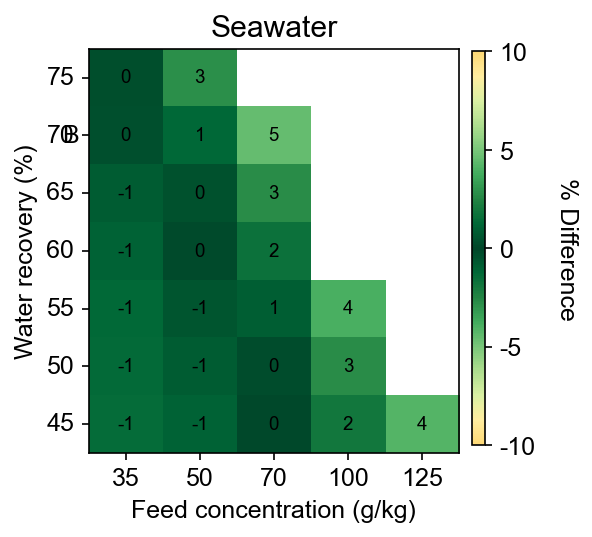

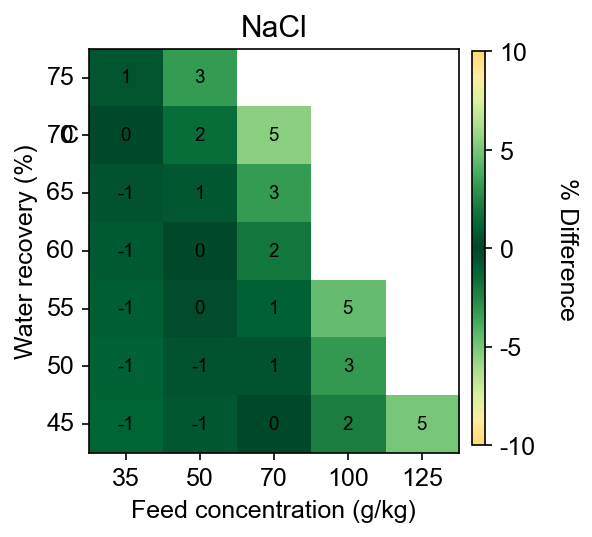

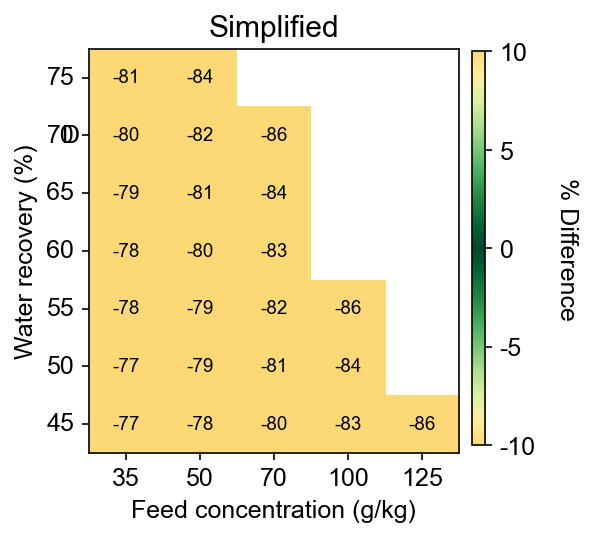

In [129]:
colormap_prop_error(data_MVC_seawater, error_sea_MVC, xticks, yticks, 1, "Vapor Pressure", "Seawater","B","plot_sea_Brine Enth Flow_MVC")
colormap_prop_error(data_MVC_nacl, error_nacl_MVC, xticks, yticks, 1, "Vapor Pressure", "NaCl", "C", "plot_nacl_Brine Enth Flow_MVC")
colormap_prop_error(data_MVC_simple, error_simple_MVC, xticks, yticks, 1, "Vapor Pressure", "Simplified", "D","plot_simple_Brine Enth Flow_MVC")

(42,)
[ 35.  50.  70. 100. 125. 150.] [45. 50. 55. 60. 65. 70. 75.]
[0] [0] 4.457471369934942 35.0 45.0
[0] [1] 4.850990712390643 35.0 50.0
[0] [2] 5.327973382687583 35.0 55.00000000000001
[0] [3] 5.918456948571445 35.0 60.0
[0] [4] 6.667662528950015 35.0 65.0
[0] [5] 7.6424999755654675 35.0 70.0
[0] [6] 8.924777440737818 35.0 75.0
[1] [0] 6.133332102040329 50.0 45.0
[1] [1] 6.678037352686449 50.0 50.0
[1] [2] 7.333042432252117 50.0 55.00000000000001
[1] [3] 8.127813863288727 50.0 60.0
[1] [4] 9.086944581442099 50.0 65.0
[1] [5] 10.176817777170138 50.0 70.0
[1] [6] 11.035684578176033 50.0 75.0
[2] [0] 8.263471617932014 70.0 45.0
[2] [1] 8.949760720401528 70.0 50.0
[2] [2] 9.71392612401872 70.0 55.00000000000001
[2] [3] 10.494293685011414 70.0 60.0
[2] [4] 11.050458964010287 70.0 65.0
[2] [5] 10.512864472950731 70.0 70.0
[2] [6] nan 70.0 75.0
[3] [0] 10.714941020242511 100.0 45.0
[3] [1] 11.061529889034853 100.0 50.0
[3] [2] 10.913039692730816 100.0 55.00000000000001
[3] [3] nan 100.0 6

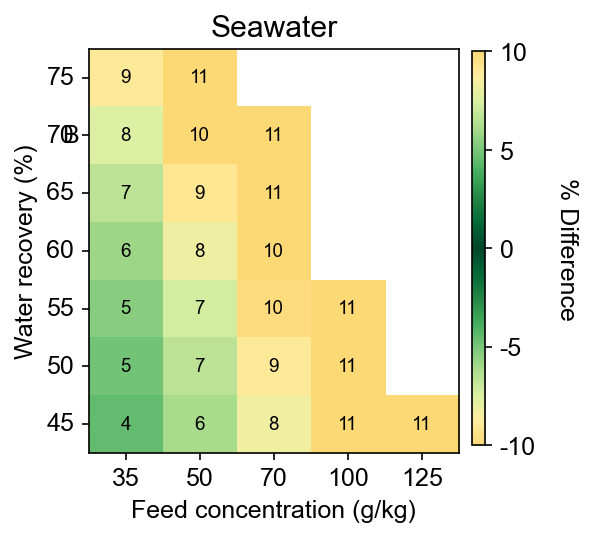

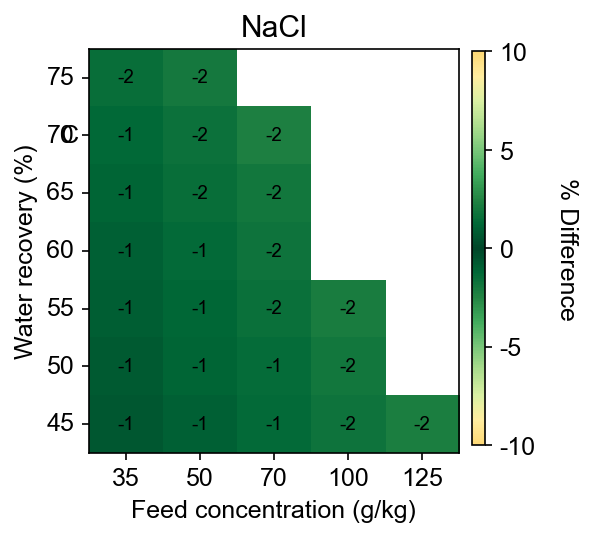

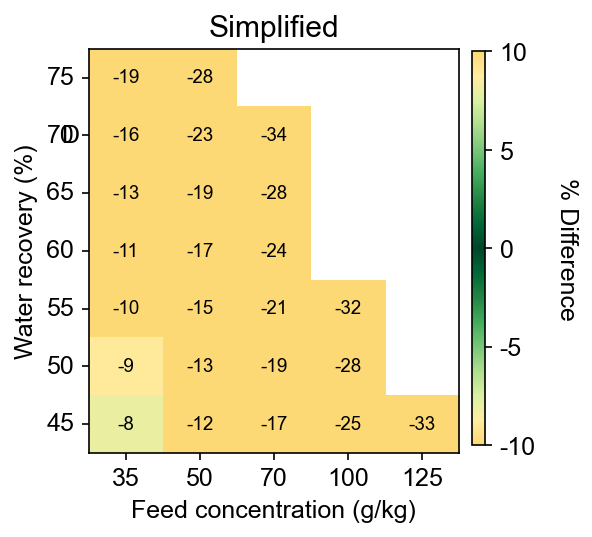

In [130]:
colormap_prop_error(data_MVC_seawater, error_sea_MVC, xticks, yticks, 1, "Brine Enth Flow", "Seawater","B","plot_sea_Brine Enth Flow_MVC")
colormap_prop_error(data_MVC_nacl, error_nacl_MVC, xticks, yticks, 1, "Brine Enth Flow", "NaCl", "C", "plot_nacl_Brine Enth Flow_MVC")
colormap_prop_error(data_MVC_simple, error_simple_MVC, xticks, yticks, 1, "Brine Enth Flow", "Simplified", "D","plot_simple_Brine Enth Flow_MVC")

(42,)
[ 35.  50.  70. 100. 125. 150.] [45. 50. 55. 60. 65. 70. 75.]
[0] [0] 0.5608858961135054 35.0 45.0
[0] [1] 0.5490255145777709 35.0 50.0
[0] [2] 0.5158795040791123 35.0 55.00000000000001
[0] [3] 0.452335493395601 35.0 60.0
[0] [4] 0.3410250849177492 35.0 65.0
[0] [5] 0.14661651364193035 35.0 70.0
[0] [6] -0.21061452633191002 35.0 75.0
[1] [0] 0.37521548150981693 50.0 45.0
[1] [1] 0.30751230083874215 50.0 50.0
[1] [2] 0.19711240700527605 50.0 55.00000000000001
[1] [3] 0.02118520934922388 50.0 60.0
[1] [4] -0.2627186819149069 50.0 65.0
[1] [5] -0.7406661876195182 50.0 70.0
[1] [6] -1.6047950682270045 50.0 75.0
[2] [0] -0.03976635680160535 70.0 45.0
[2] [1] -0.23372875921770161 70.0 50.0
[2] [2] -0.5206773068113192 70.0 55.00000000000001
[2] [3] -0.9547678252223272 70.0 60.0
[2] [4] -1.6358296210155134 70.0 65.0
[2] [5] -2.762331040009302 70.0 70.0
[2] [6] nan 70.0 75.0
[3] [0] -1.2639937298265405 100.0 45.0
[3] [1] -1.8076044982327688 100.0 50.0
[3] [2] -2.5812763022353473 100.0 55.

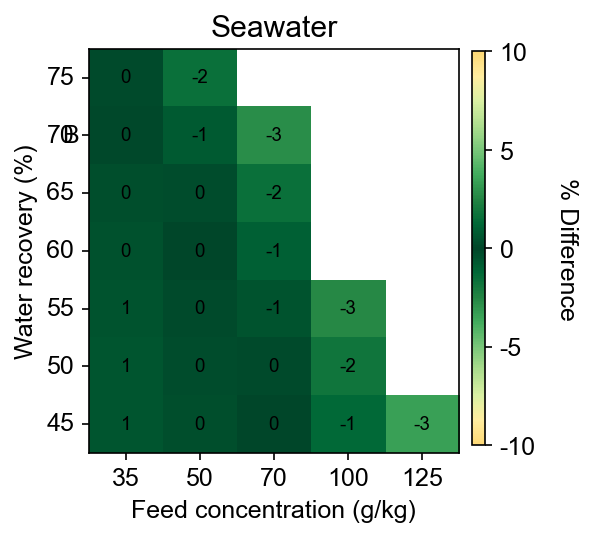

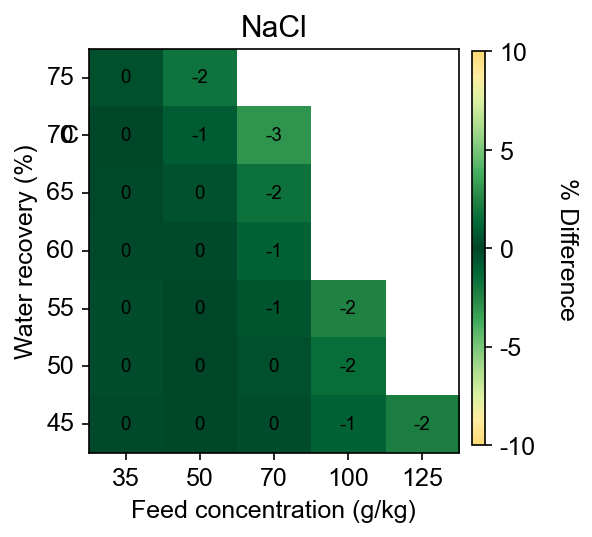

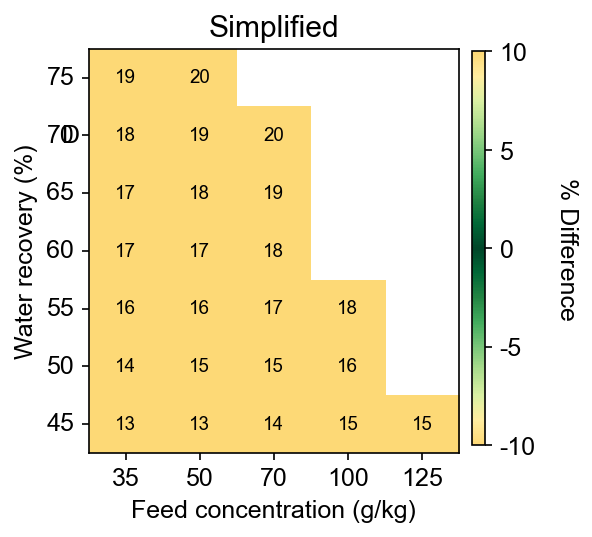

In [131]:
colormap_prop_error(data_MVC_seawater, error_sea_MVC, xticks, yticks, 1, "LCOW", "Seawater","B","plot_sea_LCOW_MVC")
colormap_prop_error(data_MVC_nacl, error_nacl_MVC, xticks, yticks, 1, "LCOW", "NaCl", "C", "plot_nacl_LCOW_MVC")
colormap_prop_error(data_MVC_simple, error_simple_MVC, xticks, yticks, 1, "LCOW", "Simplified", "D","plot_simple_LCOW_MVC")

(42,)
[ 35.  50.  70. 100. 125. 150.] [45. 50. 55. 60. 65. 70. 75.]
[0] [0] 0.4351242587484959 35.0 45.0
[0] [1] 0.4328992966124639 35.0 50.0
[0] [2] 0.41157681582267613 35.0 55.00000000000001
[0] [3] 0.3634225398442998 35.0 60.0
[0] [4] 0.27299899577487485 35.0 65.0
[0] [5] 0.10701205003010293 35.0 70.0
[0] [6] -0.21288002615233248 35.0 75.0
[1] [0] 0.2489908668748732 50.0 45.0
[1] [1] 0.20414080698495368 50.0 50.0
[1] [2] 0.11854993067179426 50.0 55.00000000000001
[1] [3] -0.029105280193788077 50.0 60.0
[1] [4] -0.28089266073555264 50.0 65.0
[1] [5] -0.7264635389975165 50.0 70.0
[1] [6] -1.5805443101109256 50.0 75.0
[2] [0] -0.16000154218353146 70.0 45.0
[2] [1] -0.314195299829055 70.0 50.0
[2] [2] -0.5632209382634619 70.0 55.00000000000001
[2] [3] -0.963566622391328 70.0 60.0
[2] [4] -1.6264234954354406 70.0 65.0
[2] [5] -2.790569183018673 70.0 70.0
[2] [6] nan 70.0 75.0
[3] [0] -1.3918670776409274 100.0 45.0
[3] [1] -1.8866459529307495 100.0 50.0
[3] [2] -2.639524268206502 100.0 55

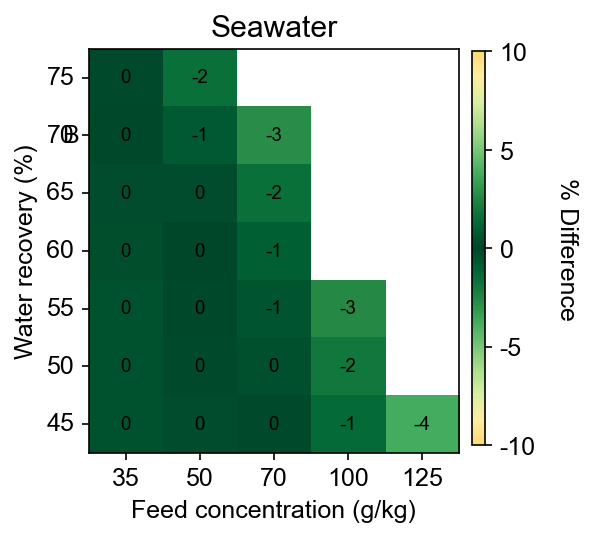

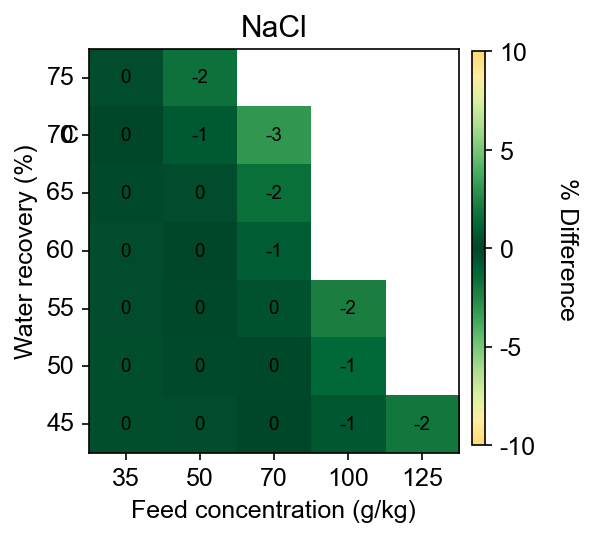

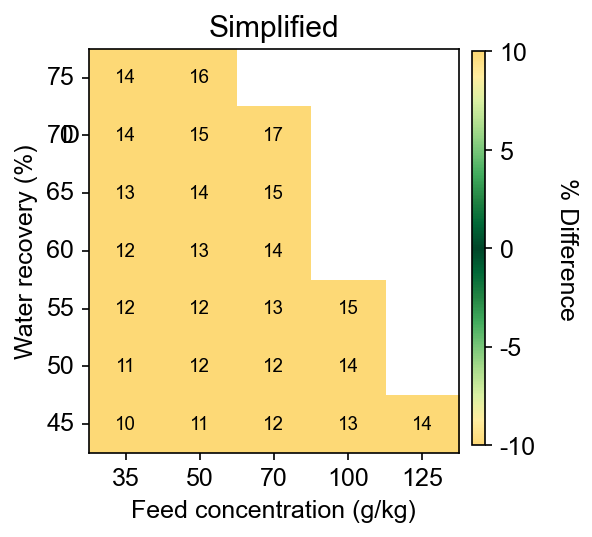

In [132]:

colormap_prop_error(data_MVC_seawater, error_sea_MVC, xticks, yticks, 1, "Compressor pressure ratio", "Seawater", "B", "plot_sea_com_P")
colormap_prop_error(data_MVC_nacl, error_nacl_MVC, xticks, yticks, 1, "Compressor pressure ratio", "NaCl", "C","plot_nacl_com_P")
colormap_prop_error(data_MVC_simple, error_simple_MVC, xticks, yticks, 1, "Compressor pressure ratio", "Simplified", "D", "plot_simple_com_P")

(42,)
[ 35.  50.  70. 100. 125. 150.] [45. 50. 55. 60. 65. 70. 75.]
[0] [0] 1.004895902771007 35.0 45.0
[0] [1] 1.0124134609352504 35.0 50.0
[0] [2] 0.9691561206827093 35.0 55.00000000000001
[0] [3] 0.85736179910326 35.0 60.0
[0] [4] 0.6414811881471786 35.0 65.0
[0] [5] 0.24707504872797706 35.0 70.0
[0] [6] -0.49563148388757056 35.0 75.0
[1] [0] 0.5660133797522086 50.0 45.0
[1] [1] 0.46786694594958655 50.0 50.0
[1] [2] 0.27126221480445717 50.0 55.00000000000001
[1] [3] -0.07022067999026406 50.0 60.0
[1] [4] -0.6453643712918785 50.0 65.0
[1] [5] -1.6361840115331143 50.0 70.0
[1] [6] -3.4494671369533 50.0 75.0
[2] [0] -0.35576835398515677 70.0 45.0
[2] [1] -0.7032330359237586 70.0 50.0
[2] [2] -1.2578304707634078 70.0 55.00000000000001
[2] [3] -2.130492226491091 70.0 60.0
[2] [4] -3.5268126397446227 70.0 65.0
[2] [5] -5.851452237441573 70.0 70.0
[2] [6] nan 70.0 75.0
[3] [0] -2.9477048867387445 100.0 45.0
[3] [1] -3.98838525700965 100.0 50.0
[3] [2] -5.51022205296759 100.0 55.00000000000

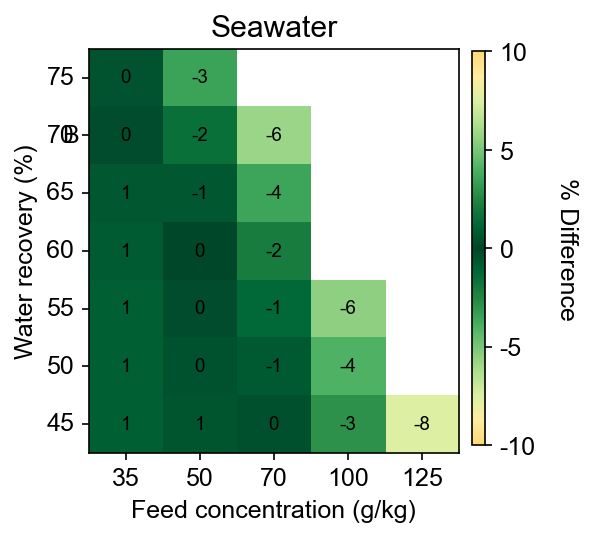

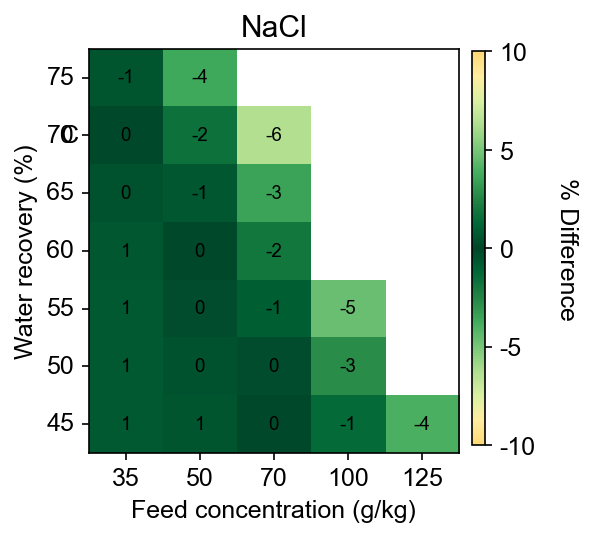

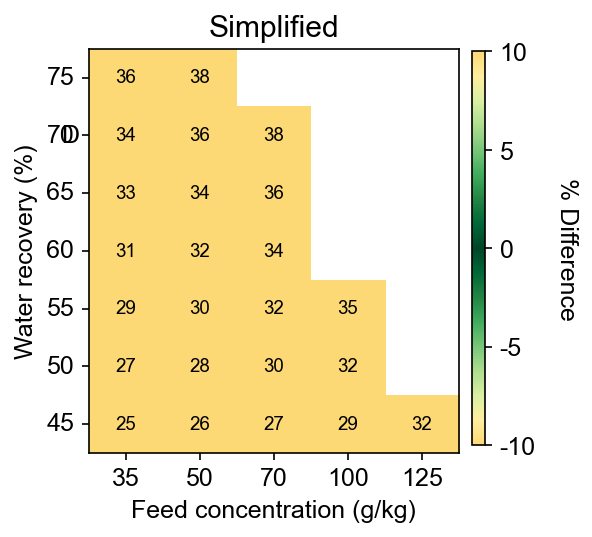

In [133]:
colormap_prop_error(data_MVC_seawater, error_sea_MVC, xticks, yticks, 0, "SEC", "Seawater","B","plot_sea_SEC_MVC")
colormap_prop_error(data_MVC_nacl, error_nacl_MVC, xticks, yticks, 0, "SEC", "NaCl", "C","plot_nacl_SEC_MVC")
colormap_prop_error(data_MVC_simple, error_simple_MVC, xticks, yticks, 0, "SEC", "Simplified", "D", "plot_simple_SEC_MVC")

(42,)
[ 35.  50.  70. 100. 125. 150.] [45. 50. 55. 60. 65. 70. 75.]
[0] [0] 0.48631592962965475 35.0 45.0
[0] [1] 0.4089719381721318 35.0 50.0
[0] [2] 0.3393198149967485 35.0 55.00000000000001
[0] [3] 0.27624917822710193 35.0 60.0
[0] [4] 0.2195413156836698 35.0 65.0
[0] [5] 0.17298046946203116 35.0 70.0
[0] [6] 0.15421889482566592 35.0 75.0
[1] [0] 0.5016255963051974 50.0 45.0
[1] [1] 0.4109448683659079 50.0 50.0
[1] [2] 0.33357490765112 50.0 55.00000000000001
[1] [3] 0.27344836088364544 50.0 60.0
[1] [4] 0.24218187548487513 50.0 65.0
[1] [5] 0.2732995746104976 50.0 70.0
[1] [6] 0.4680200626721985 50.0 75.0
[2] [0] 0.5385706383321426 70.0 45.0
[2] [1] 0.4635396062720282 70.0 50.0
[2] [2] 0.4299377958581225 70.0 55.00000000000001
[2] [3] 0.46396482491777163 70.0 60.0
[2] [4] 0.6241666013020615 70.0 65.0
[2] [5] 1.0512303523821969 70.0 70.0
[2] [6] nan 70.0 75.0
[3] [0] 1.1888306336597103 100.0 45.0
[3] [1] 1.324621540330596 100.0 50.0
[3] [2] 1.6299291531550317 100.0 55.00000000000001


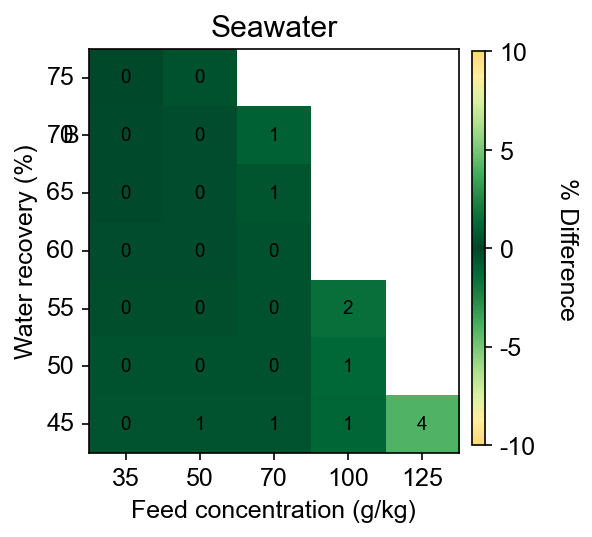

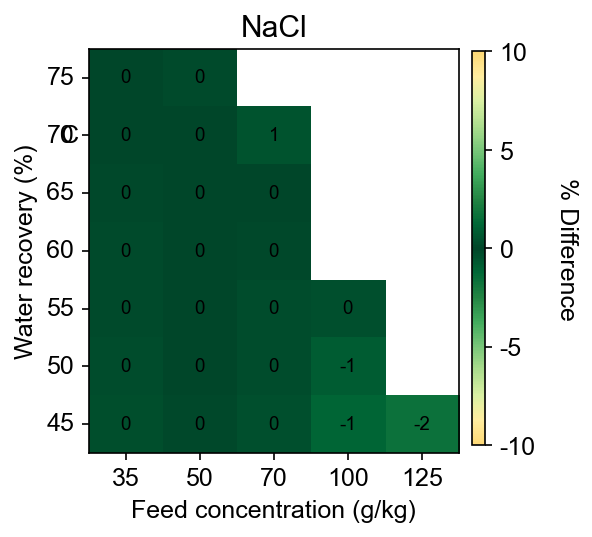

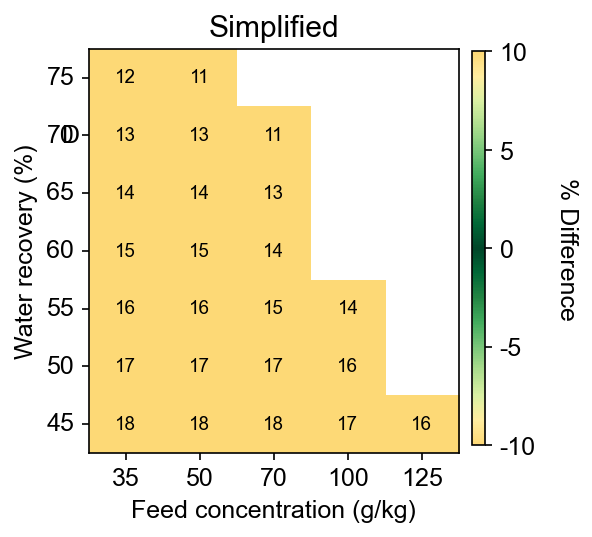

In [134]:
colormap_prop_error(data_MVC_seawater, error_sea_MVC, xticks, yticks, 2, "Evaporator area", "Seawater", "B", "plot_sea_evap_a")
colormap_prop_error(data_MVC_nacl, error_nacl_MVC, xticks, yticks, 2, "Evaporator area", "NaCl", "C","plot_nacl_evap_a")
colormap_prop_error(data_MVC_simple, error_simple_MVC, xticks, yticks, 2, "Evaporator area", "Simplified", "D", "plot_simple_evap_a")

In [135]:
sea_color = "#FFD046"
nacl_color = "#4A7B9D"
simple_color = "#467740"
reaktoro_color = "#C73E1D"

title_size = 14
plt.rcParams.update({'font.size': 14})

In [136]:
# fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(3.5*4, 2.5*4))

# data_MVC_reaktoro = data_MVC_reaktoro[data_MVC_reaktoro["# Inlet Salinity"]==0.07]
# data_MVC_seawater = data_MVC_seawater[data_MVC_seawater["# Inlet Salinity"]==0.07]
# data_MVC_nacl = data_MVC_nacl[data_MVC_nacl["# Inlet Salinity"]==0.07]

# axs[0,0].plot(data_MVC_seawater['Water Recovery']*100, data_MVC_seawater['LCOW'], color=sea_color)
# axs[0,0].plot(data_MVC_nacl['Water Recovery']*100, data_MVC_nacl['LCOW'], color=nacl_color)
# axs[0,0].plot(data_MVC_reaktoro['Water Recovery']*100, data_MVC_reaktoro['LCOW'], color=reaktoro_color)
# # axs[0,0].plot(data_MVC_simple['# Water Recovery']*100, data_MVC_simple['LCOW'], color=simple_color)

# axs[0,0].set_xlabel("Water recovery (%)", fontsize=title_size)
# axs[0,0].set_ylabel("LCOW ($\$$/m$^3$)", fontsize=title_size)


# axs[0,1].plot(data_MVC_seawater['Water Recovery']*100, data_MVC_seawater['SEC'], color=sea_color)
# axs[0,1].plot(data_MVC_nacl['Water Recovery']*100, data_MVC_nacl['SEC'], color=nacl_color)
# axs[0,1].plot(data_MVC_reaktoro['Water Recovery']*100, data_MVC_reaktoro['SEC'], color=reaktoro_color)
# # axs[0,1].plot(data_MVC_simple['# Water Recovery']*100, data_MVC_simple['SEC'], color=simple_color)

# axs[0,1].set_xlabel("Water recovery (%)", fontsize=title_size)
# axs[0,1].set_ylabel("SEC (kJ/m$^{3}$)", fontsize=title_size)

# axs[1,0].plot(data_MVC_seawater['Water Recovery']*100, data_MVC_seawater['Evaporator area'], color=sea_color)
# axs[1,0].plot(data_MVC_nacl['Water Recovery']*100, data_MVC_nacl['Evaporator area'], color=nacl_color)
# axs[1,0].plot(data_MVC_reaktoro['Water Recovery']*100, data_MVC_reaktoro['Evaporator area'], color=reaktoro_color)
# # axs[1,0].plot(data_MVC_simple['# Water Recovery']*100, data_MVC_simple['Evaporator area'], color=simple_color)

# axs[1,0].set_xlabel("Water recovery (%)", fontsize=title_size)
# axs[1,0].set_ylabel("Evaporator area (m$^{2}$)", fontsize=title_size)

# axs[1,1].plot(data_MVC_seawater['Water Recovery']*100, data_MVC_seawater['Compressor pressure ratio'], color=sea_color)
# axs[1,1].plot(data_MVC_nacl['Water Recovery']*100, data_MVC_nacl['Compressor pressure ratio'], color=nacl_color)
# axs[1,1].plot(data_MVC_reaktoro['Water Recovery']*100, data_MVC_reaktoro['Compressor pressure ratio'], color=reaktoro_color)
# # axs[1,1].plot(data_MVC_simple['# Water Recovery']*100, data_MVC_simple['Compressor pressure ratio'], color=simple_color)

# axs[1,1].set_xlabel("Water recovery (%)", fontsize=title_size)
# axs[1,1].set_ylabel("Compressor pressure ratio", fontsize=title_size)

# axs[1,0].legend(["Seawater","NaCl","Reaktoro"],loc="lower right",fontsize=title_size)

# fig.savefig("MVC_comparison")

In [137]:

data_MVC_seawater = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\data_MVC_sea_1D.csv')
data_MVC_nacl = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\data_MVC_nacl_1D.csv')
data_MVC_simple = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\data_MVC_simple_1D.csv')
data_MVC_reaktoro = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\data_MVC_reaktoro_1D.csv')

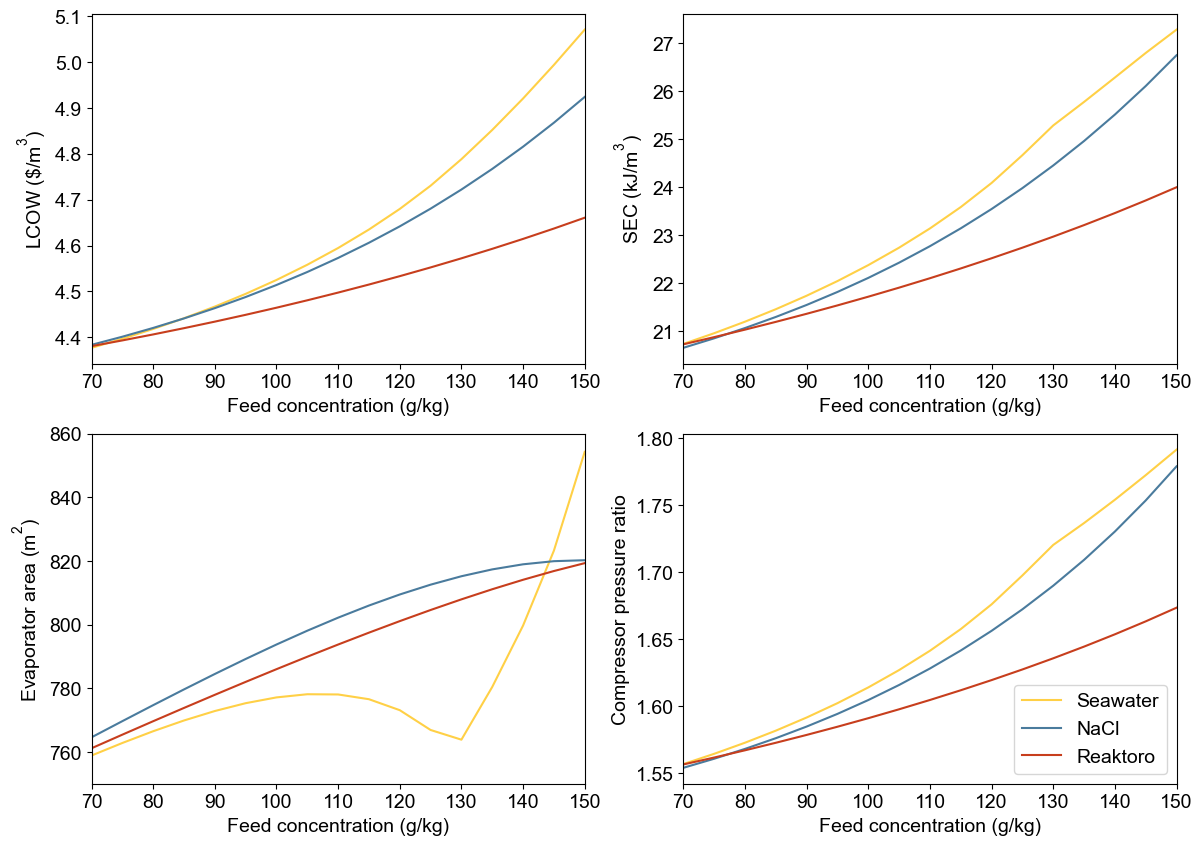

In [138]:


fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(3.5*4, 2.5*4))

axs[0,0].plot(data_MVC_seawater["# Inlet Salinity"] *1000, data_MVC_seawater['LCOW'], color=sea_color)
axs[0,0].plot(data_MVC_nacl["# Inlet Salinity"] *1000, data_MVC_nacl['LCOW'], color=nacl_color)
axs[0,0].plot(data_MVC_reaktoro["# Inlet Salinity"] *1000, data_MVC_reaktoro['LCOW'], color=reaktoro_color)
# axs[0,0].plot(data_MVC_simple["# Inlet Salinity"] *1000, data_MVC_simple['LCOW'], color=simple_color)
axs[0,0].set_xlim(70,150)
axs[0,0].set_xlabel("Feed concentration (g/kg)", fontsize=title_size)
axs[0,0].set_ylabel("LCOW ($\$$/m$^3$)", fontsize=title_size)


axs[0,1].plot(data_MVC_seawater["# Inlet Salinity"] *1000, data_MVC_seawater['SEC'], color=sea_color)
axs[0,1].plot(data_MVC_nacl["# Inlet Salinity"] *1000, data_MVC_nacl['SEC'], color=nacl_color)
axs[0,1].plot(data_MVC_reaktoro["# Inlet Salinity"] *1000, data_MVC_reaktoro['SEC'], color=reaktoro_color)
# axs[0,1].plot(data_MVC_simple["# Inlet Salinity"] *1000, data_MVC_simple['SEC'], color=simple_color)
axs[0,1].set_xlim(70,150)
axs[0,1].set_xlabel("Feed concentration (g/kg)", fontsize=title_size)
axs[0,1].set_ylabel("SEC (kJ/m$^{3}$)", fontsize=title_size)

axs[1,0].plot(data_MVC_seawater["# Inlet Salinity"] *1000, data_MVC_seawater['Evaporator area'], color=sea_color)
axs[1,0].plot(data_MVC_nacl["# Inlet Salinity"] *1000, data_MVC_nacl['Evaporator area'], color=nacl_color)
axs[1,0].plot(data_MVC_reaktoro["# Inlet Salinity"] *1000, data_MVC_reaktoro['Evaporator area'], color=reaktoro_color)
# axs[1,0].plot(data_MVC_simple["# Inlet Salinity"] *1000, data_MVC_simple['Evaporator area'], color=simple_color)
axs[1,0].set_ylim(750,860)
axs[1,0].set_xlim(70,150)
axs[1,0].set_xlabel("Feed concentration (g/kg)", fontsize=title_size)
axs[1,0].set_ylabel("Evaporator area (m$^{2}$)", fontsize=title_size)

axs[1,1].plot(data_MVC_seawater["# Inlet Salinity"] *1000, data_MVC_seawater['Compressor pressure ratio'], color=sea_color)
axs[1,1].plot(data_MVC_nacl["# Inlet Salinity"] *1000, data_MVC_nacl['Compressor pressure ratio'], color=nacl_color)
axs[1,1].plot(data_MVC_reaktoro["# Inlet Salinity"] *1000, data_MVC_reaktoro['Compressor pressure ratio'], color=reaktoro_color)
# axs[1,1].plot(data_MVC_simple["# Inlet Salinity"] *1000, data_MVC_simple['Compressor pressure ratio'], color=simple_color)
axs[1,1].set_xlim(70,150)
axs[1,1].set_xlabel("Feed concentration (g/kg)", fontsize=title_size)
axs[1,1].set_ylabel("Compressor pressure ratio", fontsize=title_size)

axs[1,1].legend(["Seawater","NaCl","Reaktoro"],loc="lower right",fontsize=title_size)

fig.savefig("MVC_comparison")